# Predictions with vectors given by PolBert Transformer model from HuggingFace

In [5]:
import pandas as pd

In [1]:
from transformers import AutoModel, AutoTokenizer
import torch

# https://huggingface.co/dkleczek/bert-base-polish-uncased-v1

model_name = "dkleczek/bert-base-polish-cased-v1"  # polbert
model = AutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)


config.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/531M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/30.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/489k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [2]:
sentences = ["To jest przykładowe zdanie.", "Za siedmioma górami, za siedmioma lasami mieszkał Tomisław Apoloniusz Curuś Bachleda Farell, jak ten piecyk z dmuchawą"]

tokenized_input = tokenizer(sentences, return_tensors="pt", padding=True, truncation=True, max_length=256)

with torch.no_grad():
    outputs = model(**tokenized_input)

sentence_embeddings = outputs.last_hidden_state.mean(dim=1)  # mean across tokens

sentence_embeddings = sentence_embeddings.numpy()

for i, sentence_embedding in enumerate(sentence_embeddings):
    print(f"Sentence {i + 1} embedding: {sentence_embedding}")

len(sentence_embeddings[0])

Sentence 1 embedding: [ 6.04719579e-01  9.69408572e-01  3.73563796e-01  4.05679420e-02
  4.88555700e-01  3.50852370e-01 -9.51496661e-02 -7.94243574e-01
 -3.53666782e-01  2.93147475e-01  9.01069224e-01  3.66282016e-02
 -5.74627936e-01  1.69926152e-01  1.80373192e-02  4.74921554e-01
 -8.99903297e-01 -4.69557941e-04  6.79888487e-01  2.76549179e-02
 -3.50699663e-01 -3.23946439e-02 -2.53880471e-01 -3.52535814e-01
 -8.65083039e-01  6.38245165e-01  6.99215353e-01 -4.14658576e-01
  1.48463085e-01  1.93446779e+00 -4.35735106e-01 -4.37409759e-01
  6.84587359e-02 -8.72062564e-01  2.59380728e-01  5.50111681e-02
  3.80143464e-01 -6.26384079e-01  6.94453478e-01 -3.11320424e-01
 -3.66860300e-01  1.32521164e+00  5.71689546e-01 -3.20166945e-01
 -3.80705036e-02  6.68143690e-01  1.46737829e-01  6.90225005e-01
 -1.09349322e+00 -2.47081861e-01 -1.35777459e-01  1.00132561e+00
  1.19227040e+00  1.10195005e+00  4.94232506e-01 -5.39849043e-01
 -8.31704617e-01 -3.82333808e-02 -1.53197646e-02  4.71048683e-01
  4

768

In [6]:
df = pd.read_csv('oversample_stemmed_train_df.csv')
df.head(3)

,text,amusement_parks,ferris_wheels,water_parks,miniature_parks,baths_and_saunas,climbing,stadiums,winter_sports,natural_springs,...,national_museums,fashion_museums,planetariums,zoos,aquariums,skyscrapers,towers,historic_architecture,bridges,prep_text
0,"Szukam miejsc, w których mogę zrelaksować się...",2,3,2,2,3,2,2,2,4,...,4,3,3,3,3,2,4,4,4,szukać miejsce w który móc zrelaksować wokół p...
1,Moje zainteresowania leżą w literaturze i sztu...,1,2,1,2,3,1,1,1,2,...,5,3,3,2,2,2,3,5,3,zainteresowanie leż w literatura i sztuca któr...
2,"Lubię także odwiedzać miejsca w sercu natury, ...",1,3,2,2,2,1,1,1,2,...,5,2,1,1,2,2,4,5,3,lubić także odwiedzać miejsce w serce natura a...


In [7]:
texts = df['text']
prep_texts = df['prep_text']
df = df.drop(['text', 'prep_text'], axis=1)
df

,amusement_parks,ferris_wheels,water_parks,miniature_parks,baths_and_saunas,climbing,stadiums,winter_sports,natural_springs,water,...,local_museums,national_museums,fashion_museums,planetariums,zoos,aquariums,skyscrapers,towers,historic_architecture,bridges
0,2,3,2,2,3,2,2,2,4,4,...,4,4,3,3,3,3,2,4,4,4
1,1,2,1,2,3,1,1,1,2,4,...,4,5,3,3,2,2,2,3,5,3
2,1,3,2,2,2,1,1,1,2,4,...,4,5,2,1,1,2,2,4,5,3
3,5,4,5,4,4,3,4,3,4,5,...,4,4,4,4,5,5,4,4,4,4
4,2,3,1,1,1,1,1,1,2,2,...,3,4,2,1,1,1,4,5,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,2,3,3,2,3,2,3,2,3,4,...,4,4,3,3,4,4,3,3,4,4
2296,2,1,4,2,3,5,1,1,4,5,...,3,4,1,2,4,4,1,3,4,3
2297,2,3,4,2,3,2,2,1,4,5,...,3,4,2,2,4,3,4,4,3,4
2298,2,3,2,1,1,2,1,1,3,2,...,3,4,1,4,1,2,3,4,3,2


In [8]:
def convert_to_binary(df, cols):
  means = df[cols].mean(axis=1)
  pref_df = pd.DataFrame()

  for col in cols:
    pref_df[col] = df[col] >= means

  return pref_df.astype(int)

In [9]:
y_train = convert_to_binary(df, df.columns)

In [10]:
list(texts)[:3]

[' Szukam miejsc, w których mogę zrelaksować się wokół pięknych krajobrazów, a jednocześnie cieszyć się wyjątkowymi zabytkami i tradycjami.. Jestem głównie zainteresowany przyrodą, architekturą i kulturą lokalną.Jestem turystą, który uwielbia spokojne miejsca z dala od zgiełku',
 'Moje zainteresowania leżą w literaturze i sztuce, które lubię czytać na stronach książek, odwiedzanie muzeów, uczestniczenie w wydarzeniach kulturalnych, studiowanie historii i architektury mojego otoczenia, przyciągnięcia spokojenia miejsc kulturowych i ciesząc się pięknem artystycznychWyrażenia.',
 'Lubię także odwiedzać miejsca w sercu natury, gdzie atmosfera jest wciąż i naprawdę autentyczna.Mam pasję czytania książek i robienia zdjęć krajobrazów.W wolnym czasie lubię odkrywać muzea, galerie sztuki i starożytne lokalizacje.']

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

X_parts = {}

for i in range(5):
  tokenized_input = tokenizer(list(texts[i*460 : (i+1)*460]), return_tensors="pt", padding=True, truncation=True, max_length=256).to(device)

  with torch.no_grad():
      outputs = model(**tokenized_input)

  sentence_embeddings = outputs.last_hidden_state.mean(dim=1)
  sentence_embeddings = sentence_embeddings.cpu().numpy()

  X_parts['part_' + str(i)] = pd.DataFrame(sentence_embeddings)


In [12]:
X_base = pd.concat(list(X_parts.values()), ignore_index=True)

In [13]:
X_base.head(3)

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.625740,-0.310600,-0.074569,1.225857,-0.774691,0.083932,0.634690,-0.305122,-0.444126,0.870472,...,-1.158219,0.613022,0.809151,-0.401207,-0.334908,-0.003540,-0.101070,0.258116,0.667617,-0.159297
1,0.328211,-0.472729,-0.301459,0.902462,-0.328301,0.566540,-0.256112,-0.072229,-0.433513,0.892524,...,-0.359195,0.486915,0.320964,-0.678245,-0.344119,0.125024,0.046881,0.328574,0.597331,0.000726
2,1.012824,-0.383384,0.030137,0.924579,-0.851998,0.095772,0.485429,-0.224796,-0.765761,0.966623,...,-0.506252,0.034598,0.557854,-0.156743,0.029975,-0.110719,0.391362,0.382963,0.477054,0.471111


In [14]:
X_base.shape

(2300, 768)

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

tf.random.set_seed(2023)


INPUT_SHAPE = X_base.shape[1]


model_base = Sequential([
    Dense(512, activation='relu', input_shape=(INPUT_SHAPE,)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(53, activation='sigmoid')
])


model_base.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model_base.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               393728    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2

In [16]:
result = model_base.fit(X_base, y_train, epochs=50, batch_size=32, validation_split=0.15)

Epoch 1/50
62/62 [==============================] - 7s 9ms/step - loss: 0.6116 - accuracy: 0.0061 - val_loss: 0.5282 - val_accuracy: 0.0000e+00
Epoch 2/50
62/62 [==============================] - 0s 5ms/step - loss: 0.5373 - accuracy: 0.0026 - val_loss: 0.4924 - val_accuracy: 0.0029
Epoch 3/50
62/62 [==============================] - 0s 6ms/step - loss: 0.5054 - accuracy: 0.0010 - val_loss: 0.4618 - val_accuracy: 0.0029
Epoch 4/50
62/62 [==============================] - 0s 6ms/step - loss: 0.4818 - accuracy: 0.0010 - val_loss: 0.4504 - val_accuracy: 0.0029
Epoch 5/50
62/62 [==============================] - 0s 6ms/step - loss: 0.4657 - accuracy: 0.0031 - val_loss: 0.4502 - val_accuracy: 0.0029
Epoch 6/50
62/62 [==============================] - 0s 6ms/step - loss: 0.4557 - accuracy: 0.0031 - val_loss: 0.4310 - val_accuracy: 0.0029
Epoch 7/50
62/62 [==============================] - 0s 5ms/step - loss: 0.4487 - accuracy: 0.0026 - val_loss: 0.4340 - val_accuracy: 0.0029
Epoch 8/50
62/62

In [17]:
test_df = pd.read_csv('test_df.csv')

test_texts = test_df['text']
test_df = test_df.drop(['text', 'date'], axis=1)
test_df.head(3)

,amusement_parks,ferris_wheels,water_parks,miniature_parks,baths_and_saunas,climbing,stadiums,winter_sports,natural_springs,water,...,local_museums,national_museums,fashion_museums,planetariums,zoos,aquariums,skyscrapers,towers,historic_architecture,bridges
0,3,0,4,1,1,1,0,1,1,4,...,2,2,0,4,2,2,1,1,3,1
1,1,2,1,1,1,1,1,1,1,2,...,4,5,1,1,1,1,1,3,5,2
2,4,4,2,1,2,4,1,0,0,3,...,1,3,1,1,3,3,1,2,2,2


In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

tokenized_input = tokenizer(list(test_texts), return_tensors="pt", padding=True, truncation=True, max_length=256).to(device)

with torch.no_grad():
    outputs = model(**tokenized_input)

sentence_embeddings = outputs.last_hidden_state.mean(dim=1)
sentence_embeddings = sentence_embeddings.cpu().numpy()

X_test = pd.DataFrame(sentence_embeddings)

In [19]:
X_test.head(3)

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.528455,-0.213993,0.023330,0.718429,-0.393594,0.200962,0.482911,-0.298265,-0.296215,0.897485,...,-0.491132,0.444342,0.620026,-0.202182,-0.133163,-0.138279,0.059693,0.575820,0.754308,0.326791
1,0.556422,-0.269965,-0.025233,1.044117,-0.580801,-0.069127,0.074708,-0.410139,-0.928352,0.777126,...,-0.679998,0.413879,0.512415,-0.620062,0.219927,-0.450931,-0.189421,0.140460,0.701404,-0.053938
2,0.809981,-0.296682,0.228777,0.733362,-0.634619,0.111390,0.438590,-0.086982,-0.387068,1.029810,...,-0.505090,0.188231,0.836467,0.179628,-0.705051,0.212790,0.218540,1.251218,0.494536,0.564447


In [20]:
cols = test_df.columns

In [21]:
y_test = convert_to_binary(test_df, test_df.columns)

In [22]:
def get_attr_from_vector(vector, threshold=0.5):
  return [1 if elem >= threshold else 0 for elem in vector]

In [23]:
y_pred = model_base.predict(X_test)
y_pred_cat = pd.DataFrame([get_attr_from_vector(vector) for vector in y_pred])
y_pred_cat.columns = cols
y_pred_cat.head(3)

1/1 [==============================] - 0s 193ms/step


,amusement_parks,ferris_wheels,water_parks,miniature_parks,baths_and_saunas,climbing,stadiums,winter_sports,natural_springs,water,...,local_museums,national_museums,fashion_museums,planetariums,zoos,aquariums,skyscrapers,towers,historic_architecture,bridges
0,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,1,0,1,1,1
1,0,1,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,1,1,1
2,0,1,0,0,0,0,0,0,1,1,...,1,1,0,0,0,0,0,1,1,1


In [25]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

total_ac = 0
total_rec = 0
total_prec = 0

size = 26

for i in range(size):
  tmp_pred = y_pred_cat.iloc[i]
  tmp_true = y_test.iloc[i]

  ac_score = accuracy_score(tmp_pred, tmp_true)
  rec_score = recall_score(tmp_pred, tmp_true)
  prec_score = precision_score(tmp_pred, tmp_true)

  total_ac += ac_score
  total_rec += rec_score
  total_prec += prec_score

  bert_bigger_nn_base_accuracy = total_ac/size
  bert_bigger_nn_base_recall = total_rec/size
  bert_bigger_nn_base_precision = total_prec/size

  print(f"{i} - Accuracy: {ac_score} | Recall: {rec_score} | Precision: {prec_score}")


print(f"\nMean - Accuracy: {total_ac/size } | Recall: {total_rec/size} | Precision: {total_prec/size}")

0 - Accuracy: 0.660377358490566 | Recall: 0.5238095238095238 | Precision: 0.5789473684210527
1 - Accuracy: 0.8113207547169812 | Recall: 0.8076923076923077 | Precision: 0.8076923076923077
2 - Accuracy: 0.6037735849056604 | Recall: 0.6666666666666666 | Precision: 0.38461538461538464
3 - Accuracy: 0.6981132075471698 | Recall: 0.675 | Precision: 0.9
4 - Accuracy: 0.9056603773584906 | Recall: 0.9310344827586207 | Precision: 0.9
5 - Accuracy: 0.8490566037735849 | Recall: 0.9642857142857143 | Precision: 0.7941176470588235
6 - Accuracy: 0.7735849056603774 | Recall: 0.9411764705882353 | Precision: 0.5925925925925926
7 - Accuracy: 0.7169811320754716 | Recall: 0.631578947368421 | Precision: 0.6
8 - Accuracy: 0.6981132075471698 | Recall: 0.6 | Precision: 0.8181818181818182
9 - Accuracy: 0.7735849056603774 | Recall: 0.7272727272727273 | Precision: 0.7272727272727273
10 - Accuracy: 0.6981132075471698 | Recall: 0.8214285714285714 | Precision: 0.6764705882352942
11 - Accuracy: 0.5660377358490566 | Rec

In [26]:
total_ac = 0

for col in cols:
  ac_score = accuracy_score(y_pred_cat[col], y_test[col])
  total_ac += ac_score
  print(f"Accuracy of predicting {col}: {ac_score}")

bert_bigger_nn_accuracy_base = total_ac/len(cols)

print(f"\nMean accuracy in test dataset: {total_ac/len(cols)}")

Accuracy of predicting amusement_parks: 0.8076923076923077
Accuracy of predicting ferris_wheels: 0.6923076923076923
Accuracy of predicting water_parks: 0.7692307692307693
Accuracy of predicting miniature_parks: 0.8076923076923077
Accuracy of predicting baths_and_saunas: 0.7307692307692307
Accuracy of predicting climbing: 0.7692307692307693
Accuracy of predicting stadiums: 0.8846153846153846
Accuracy of predicting winter_sports: 0.8846153846153846
Accuracy of predicting natural_springs: 0.5
Accuracy of predicting water: 0.8076923076923077
Accuracy of predicting nature_reserves: 0.6538461538461539
Accuracy of predicting beaches: 0.7692307692307693
Accuracy of predicting railway_stations: 0.6153846153846154
Accuracy of predicting dams: 0.8846153846153846
Accuracy of predicting mints: 0.8846153846153846
Accuracy of predicting mineshafts: 0.5
Accuracy of predicting science_museums: 0.6923076923076923
Accuracy of predicting churches: 0.6923076923076923
Accuracy of predicting cathedrals: 0.73

# Same with preprocessed texts

In [27]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

X_parts = {}

for i in range(5):
  tokenized_input = tokenizer(list(prep_texts[i*460 : (i+1)*460]), return_tensors="pt", padding=True, truncation=True, max_length=256).to(device)

  with torch.no_grad():
      outputs = model(**tokenized_input)

  sentence_embeddings = outputs.last_hidden_state.mean(dim=1)
  sentence_embeddings = sentence_embeddings.cpu().numpy()

  X_parts['part_' + str(i)] = pd.DataFrame(sentence_embeddings)

X_prep = pd.concat(list(X_parts.values()), ignore_index=True)
X_prep.head(5)

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.299654,-0.541456,-0.051348,1.268499,-1.256889,0.188665,0.408472,-0.023464,0.514363,0.899882,...,-1.003298,0.641296,0.891290,0.159300,0.340718,0.411762,0.652450,0.587549,0.444160,0.004792
1,0.296601,-0.691184,-0.618586,1.098039,-0.981969,0.187773,0.146858,-0.154917,0.415254,0.569774,...,-0.244215,1.422257,0.490856,-0.345433,0.451418,0.510574,0.721982,0.873329,0.324577,0.190850
2,0.357724,-0.300503,-0.193713,1.281842,-1.337974,-0.003251,0.536593,-0.603226,0.123042,0.619474,...,-0.547379,1.201960,0.901668,0.486353,0.696079,0.267550,0.836334,1.299598,0.117944,0.741327
3,0.602259,-0.491664,-0.680295,0.638724,-0.783873,0.334276,-0.044978,-0.535901,0.460896,-0.028367,...,-1.145118,0.758754,1.275566,0.502394,0.316365,0.691408,0.631574,1.506438,-0.247928,0.170286
4,0.061772,-0.252748,-0.264580,0.790194,-1.296263,-0.080453,0.163986,-0.190096,0.329727,0.857625,...,-0.203055,1.286986,0.617963,0.114396,0.709133,0.586158,0.098768,0.753567,-0.161557,0.297816


In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

tf.random.set_seed(2023)

INPUT_SHAPE = X_prep.shape[1]

model_prep = Sequential([
    Dense(512, activation='relu', input_shape=(INPUT_SHAPE,)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(53, activation='sigmoid')
])


model_prep.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model_prep.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               393728    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)               

In [29]:
! pip install stop_words
! pip install pyMorfologik

  Preparing metadata (setup.py) ... done
  Created wheel for stop_words: filename=stop_words-2018.7.23-py3-none-any.whl size=32895 sha256=01f0326d932f169e11694f8e5efad65210616333fd98f463e0b9c53793949454
  Stored in directory: /root/.cache/pip/wheels/d0/1a/23/f12552a50cb09bcc1694a5ebb6c2cd5f2a0311de2b8c3d9a89
Successfully built stop_words
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyMorfologik: filename=pyMorfologik-0.2.2-py3-none-any.whl size=3595603 sha256=0c8114ce0139a017748709a85d19ccef35c93fcb16495e1027ef3717a129273f
  Stored in directory: /root/.cache/pip/wheels/c5/7b/f8/1d75b1eb41c0ab7ef6a5d621a1e25094554db8556287a297f4
Successfully built pyMorfologik


In [30]:
import re
from string import punctuation
from stop_words import get_stop_words
from pyMorfologik import Morfologik
from pyMorfologik.parsing import ListParser
import string


parser = ListParser()
stemmer = Morfologik()

stopwords_pl = get_stop_words("pl")


def preprocess_text(text):
    translator = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
    new_text = text.translate(translator)
    new_text = re.sub(r'\d+', '', new_text)
    new_text = re.sub(r'\s+', ' ', new_text)
    new_text = new_text.strip()
    new_text = new_text.lower()

    stems = stemmer.stem([new_text], parser)
    tokens = [(list(stems[i][1].keys())[0] if len(list(stems[i][1].keys())) > 0 else stems[i][0]) for i in range(len(stems))]

    filtered_tokens = [token for token in tokens if token not in stopwords_pl]
    filtered_tokens = [token for token in filtered_tokens if token!= '']
    processed_text = " ".join(filtered_tokens)

    return processed_text

In [31]:
test_texts_prep = [preprocess_text(text) for text in test_texts]

In [32]:
test_texts_prep[:3]

['interesować matematyka fizyka gra komputerowy i planszowy lubić słuchać muzyk szczególnie elektroniczny w wolny czas gram w gra często karciany turowy czytać też książka czas oglądać serial ulubiony tematyka fantasy i science fiction lubić dowiadywać zaskakujący rzecz różny temat wola spędzać czas raczej otoczyć przyroda zgiełk miasto lubić eksperymentować z nowy smak',
 'student historia z pasja eksploracja muzeum i fascynacja miejsce o bogaty historia hobby zgłębiać przeszłość i odkrywać dziedzictwo kulturowy wolny czas chętnie spędzać w miejsce który świadek ważny wydarzenie historyczny',
 'interesować gotowanie i pieczenie często robić w wolny czas lubić także tańczyć tańce towarzyski preferować aktywny sposób spędzać czas ale przepadać za zwiedzać architektura historyczny zabytek wola raczej ciekawy i mniej typowy opcja lubić jeść posiłki w spokojny miejsce próbować nowy rzecz szczególnie z kuchnia polski włoski hiszpański i meksykański']

In [33]:
tokenized_input = tokenizer(test_texts_prep, return_tensors="pt", padding=True, truncation=True, max_length=256).to(device)

with torch.no_grad():
    outputs = model(**tokenized_input)

sentence_embeddings = outputs.last_hidden_state.mean(dim=1)
sentence_embeddings = sentence_embeddings.cpu().numpy()

X_test_prep = pd.DataFrame(sentence_embeddings)

In [34]:
X_test_prep.head(3)

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.163605,-0.663888,-0.654959,0.788471,-1.212390,-0.296694,0.081919,0.030878,0.16630,0.598846,...,-0.526414,0.852357,0.896248,0.614558,0.568670,0.634259,0.836074,1.309092,-0.097868,0.896567
1,0.793872,-0.444224,-0.320868,0.958361,-1.576789,0.147663,0.038904,-1.116587,-0.05715,0.258262,...,-1.149630,0.651594,0.882432,0.292237,1.258462,0.644922,0.636396,0.868134,-0.027524,0.434384
2,0.451288,-0.680029,-0.531159,0.753367,-1.017150,-0.024216,0.161789,-0.142669,0.49278,0.460773,...,-0.590095,0.725732,1.346071,0.714731,-0.011845,0.615322,0.457197,1.922315,0.046647,0.297546


In [35]:
result = model_prep.fit(X_prep, y_train, epochs=50, batch_size=32, validation_split=0.15)

Epoch 1/50
62/62 [==============================] - 2s 9ms/step - loss: 0.6009 - accuracy: 0.0087 - val_loss: 0.5249 - val_accuracy: 0.0000e+00
Epoch 2/50
62/62 [==============================] - 0s 6ms/step - loss: 0.5344 - accuracy: 0.0000e+00 - val_loss: 0.4947 - val_accuracy: 0.0000e+00
Epoch 3/50
62/62 [==============================] - 0s 6ms/step - loss: 0.5068 - accuracy: 5.1151e-04 - val_loss: 0.4706 - val_accuracy: 0.0000e+00
Epoch 4/50
62/62 [==============================] - 0s 6ms/step - loss: 0.4888 - accuracy: 5.1151e-04 - val_loss: 0.4571 - val_accuracy: 0.0000e+00
Epoch 5/50
62/62 [==============================] - 0s 6ms/step - loss: 0.4778 - accuracy: 0.0010 - val_loss: 0.4516 - val_accuracy: 0.0000e+00
Epoch 6/50
62/62 [==============================] - 0s 6ms/step - loss: 0.4689 - accuracy: 0.0010 - val_loss: 0.4398 - val_accuracy: 0.0000e+00
Epoch 7/50
62/62 [==============================] - 0s 6ms/step - loss: 0.4624 - accuracy: 0.0010 - val_loss: 0.4321 - val_a

In [36]:
y_pred = model_prep.predict(X_test_prep)
y_pred_cat = pd.DataFrame([get_attr_from_vector(vector) for vector in y_pred])
y_pred_cat.columns = cols
y_pred_cat.head(3)

1/1 [==============================] - 0s 72ms/step


,amusement_parks,ferris_wheels,water_parks,miniature_parks,baths_and_saunas,climbing,stadiums,winter_sports,natural_springs,water,...,local_museums,national_museums,fashion_museums,planetariums,zoos,aquariums,skyscrapers,towers,historic_architecture,bridges
0,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,1,1
2,0,0,0,0,0,0,0,0,0,1,...,1,1,0,0,1,1,0,1,1,0


In [37]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

total_ac = 0
total_rec = 0
total_prec = 0

size = 26

for i in range(size):
  tmp_pred = y_pred_cat.iloc[i]
  tmp_true = y_test.iloc[i]

  ac_score = accuracy_score(tmp_pred, tmp_true)
  rec_score = recall_score(tmp_pred, tmp_true)
  prec_score = precision_score(tmp_pred, tmp_true)

  total_ac += ac_score
  total_rec += rec_score
  total_prec += prec_score

  bert_bigger_nn_prep_accuracy = total_ac/size
  bert_bigger_nn_prep_recall = total_rec/size
  bert_bigger_nn_prep_precision = total_prec/size

  print(f"{i} - Accuracy: {ac_score} | Recall: {rec_score} | Precision: {prec_score}")


print(f"\nMean - Accuracy: {total_ac/size } | Recall: {total_rec/size} | Precision: {total_prec/size}")

0 - Accuracy: 0.6415094339622641 | Recall: 0.5 | Precision: 0.5789473684210527
1 - Accuracy: 0.8679245283018868 | Recall: 0.88 | Precision: 0.8461538461538461
2 - Accuracy: 0.6981132075471698 | Recall: 0.7777777777777778 | Precision: 0.5384615384615384
3 - Accuracy: 0.7924528301886793 | Recall: 0.8275862068965517 | Precision: 0.8
4 - Accuracy: 0.9056603773584906 | Recall: 0.9310344827586207 | Precision: 0.9
5 - Accuracy: 0.7358490566037735 | Recall: 0.9166666666666666 | Precision: 0.6470588235294118
6 - Accuracy: 0.7924528301886793 | Recall: 0.8636363636363636 | Precision: 0.7037037037037037
7 - Accuracy: 0.7735849056603774 | Recall: 1.0 | Precision: 0.4
8 - Accuracy: 0.6981132075471698 | Recall: 0.6071428571428571 | Precision: 0.7727272727272727
9 - Accuracy: 0.7735849056603774 | Recall: 0.7777777777777778 | Precision: 0.6363636363636364
10 - Accuracy: 0.5849056603773585 | Recall: 0.8 | Precision: 0.47058823529411764
11 - Accuracy: 0.5471698113207547 | Recall: 0.5357142857142857 | Pre

In [38]:
total_ac = 0

for col in cols:
  ac_score = accuracy_score(y_pred_cat[col], y_test[col])
  total_ac += ac_score
  print(f"Accuracy of predicting {col}: {ac_score}")

bert_bigger_nn_accuracy_prep = total_ac/len(cols)

print(f"\nMean accuracy in test dataset: {total_ac/len(cols)}")

Accuracy of predicting amusement_parks: 0.9230769230769231
Accuracy of predicting ferris_wheels: 0.7307692307692307
Accuracy of predicting water_parks: 0.7692307692307693
Accuracy of predicting miniature_parks: 0.7692307692307693
Accuracy of predicting baths_and_saunas: 0.7307692307692307
Accuracy of predicting climbing: 0.8076923076923077
Accuracy of predicting stadiums: 0.8461538461538461
Accuracy of predicting winter_sports: 0.8846153846153846
Accuracy of predicting natural_springs: 0.6153846153846154
Accuracy of predicting water: 0.8461538461538461
Accuracy of predicting nature_reserves: 0.6538461538461539
Accuracy of predicting beaches: 0.6923076923076923
Accuracy of predicting railway_stations: 0.6538461538461539
Accuracy of predicting dams: 0.8461538461538461
Accuracy of predicting mints: 0.8846153846153846
Accuracy of predicting mineshafts: 0.5769230769230769
Accuracy of predicting science_museums: 0.7692307692307693
Accuracy of predicting churches: 0.6923076923076923
Accuracy 

In [42]:
# from first_models notebook

tested_options_acc = {'doc2vec_simple_nn_accuracy': 0.6690856313497823,
                      'tfidf_simple_nn_accuracy': 0.7097242380261248,
                      'tfidf_bigger_nn_accuracy': 0.7097242380261248,
                      'tfidf_gb_accuracy': 0.6850507982583457}

tested_options_acc['bert_bigger_nn_base_accuracy'] = bert_bigger_nn_base_accuracy
tested_options_acc['bert_bigger_nn_prep_accuracy'] = bert_bigger_nn_prep_accuracy

In [43]:
tested_options_acc

{'doc2vec_simple_nn_accuracy': 0.6690856313497823,
 'tfidf_simple_nn_accuracy': 0.7097242380261248,
 'tfidf_bigger_nn_accuracy': 0.7097242380261248,
 'tfidf_gb_accuracy': 0.6850507982583457,
 'bert_bigger_nn_base_accuracy': 0.7162554426705371,
 'bert_bigger_nn_prep_accuracy': 0.7271407837445575}

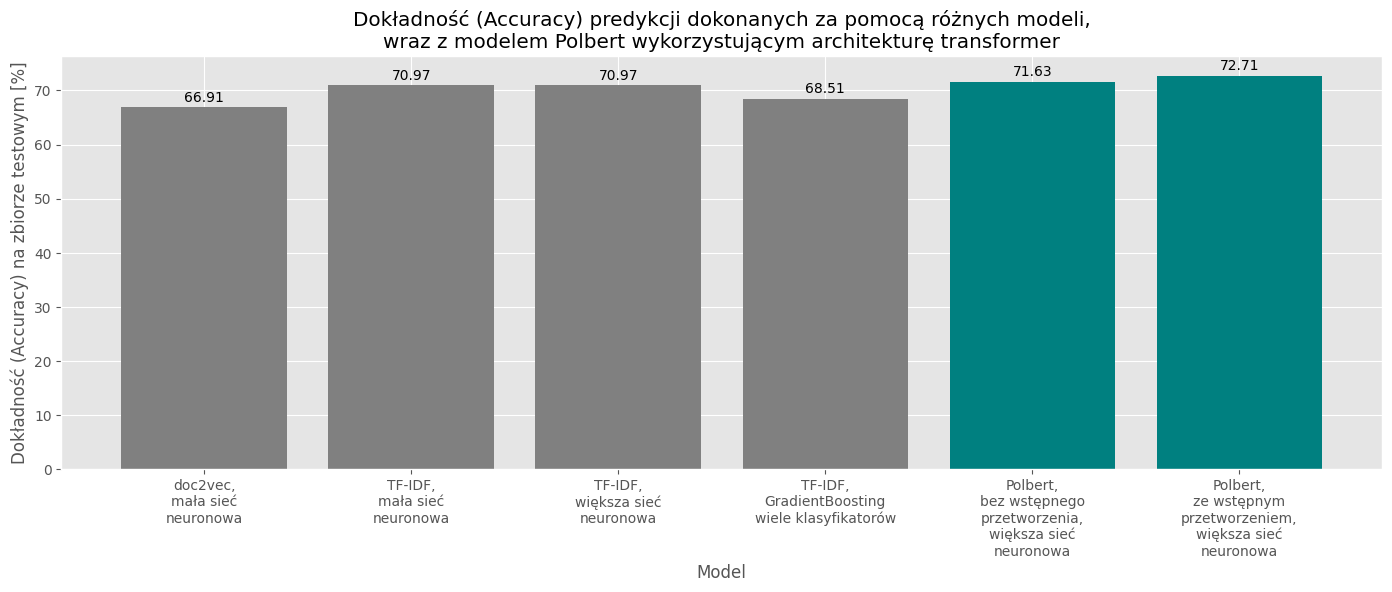

In [51]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

keys = ['doc2vec,\nmała sieć\nneuronowa', 'TF-IDF,\nmała sieć\nneuronowa', 'TF-IDF,\nwiększa sieć\nneuronowa',
        'TF-IDF,\nGradientBoosting\nwiele klasyfikatorów\n', 'Polbert,\nbez wstępnego\nprzetworzenia,\nwiększa sieć\nneuronowa',
        'Polbert,\nze wstępnym\nprzetworzeniem,\nwiększa sieć\nneuronowa']

values = [val*100 for val in list(tested_options_acc.values())]


plt.figure(figsize=(14, 6))
bars = plt.bar(keys, values, color=['gray' for _ in range(4)]+['teal' for _ in range(2)])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('Dokładność (Accuracy) na zbiorze testowym [%]')
plt.title('Dokładność (Accuracy) predykcji dokonanych za pomocą różnych modeli,\nwraz z modelem Polbert wykorzystującym architekturę transformer')

plt.tight_layout(pad=1)
plt.savefig('ml_classifier_accuracy_polbert.png')
plt.show()

In [48]:
tested_options_rec = {'doc2vec_simple_nn_recall': 0.7346125849668288,
                      'tfidf_simple_nn_recall': 0.7766475638498401,
                      'tfidf_bigger_nn_recall': 0.7787785121376258,
                      'tfidf_gb_recall': 0.7372439629118616}

tested_options_rec['bert_bigger_nn_base_recall'] = bert_bigger_nn_base_recall
tested_options_rec['bert_bigger_nn_prep_recall'] = bert_bigger_nn_prep_recall

tested_options_rec

{'doc2vec_simple_nn_recall': 0.7346125849668288,
 'tfidf_simple_nn_recall': 0.7766475638498401,
 'tfidf_bigger_nn_recall': 0.7787785121376258,
 'tfidf_gb_recall': 0.7372439629118616,
 'bert_bigger_nn_base_recall': 0.7485046289761036,
 'bert_bigger_nn_prep_recall': 0.7654402074894953}

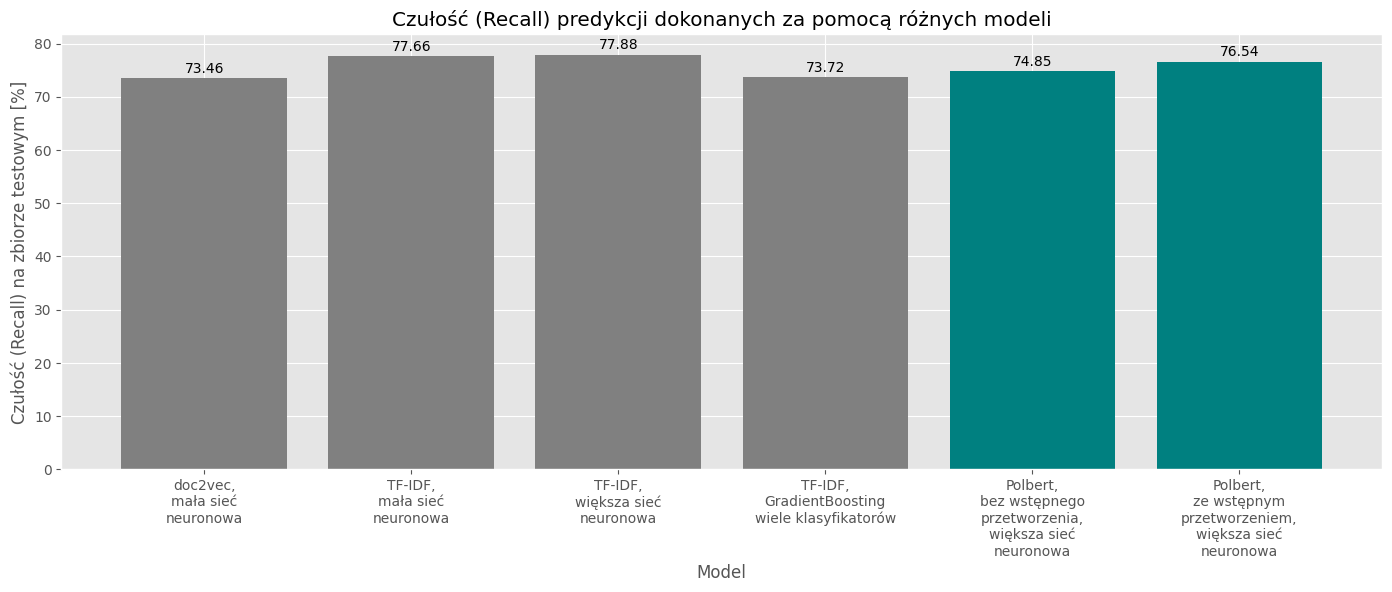

In [52]:
values = [val*100 for val in list(tested_options_rec.values())]


plt.figure(figsize=(14, 6))
bars = plt.bar(keys, values, color=['gray' for _ in range(4)]+['teal' for _ in range(2)])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('Czułość (Recall) na zbiorze testowym [%]')
plt.title('Czułość (Recall) predykcji dokonanych za pomocą różnych modeli')

plt.tight_layout(pad=1)
plt.savefig('ml_classifier_recall_polbert.png')
plt.show()

In [53]:
tested_options_prec = {'doc2vec_simple_nn_precision': 0.5523979500769713,
                        'tfidf_simple_nn_precision': 0.6287660676456441,
                        'tfidf_bigger_nn_precision': 0.6074554151256809,
                        'tfidf_gb_precision': 0.5966024220044214}

tested_options_prec['bert_bigger_nn_base_precision'] = bert_bigger_nn_base_precision
tested_options_prec['bert_bigger_nn_prep_precision'] = bert_bigger_nn_prep_precision

tested_options_prec

{'doc2vec_simple_nn_precision': 0.5523979500769713,
 'tfidf_simple_nn_precision': 0.6287660676456441,
 'tfidf_bigger_nn_precision': 0.6074554151256809,
 'tfidf_gb_precision': 0.5966024220044214,
 'bert_bigger_nn_base_precision': 0.6673718478259699,
 'bert_bigger_nn_prep_precision': 0.6883342516954456}

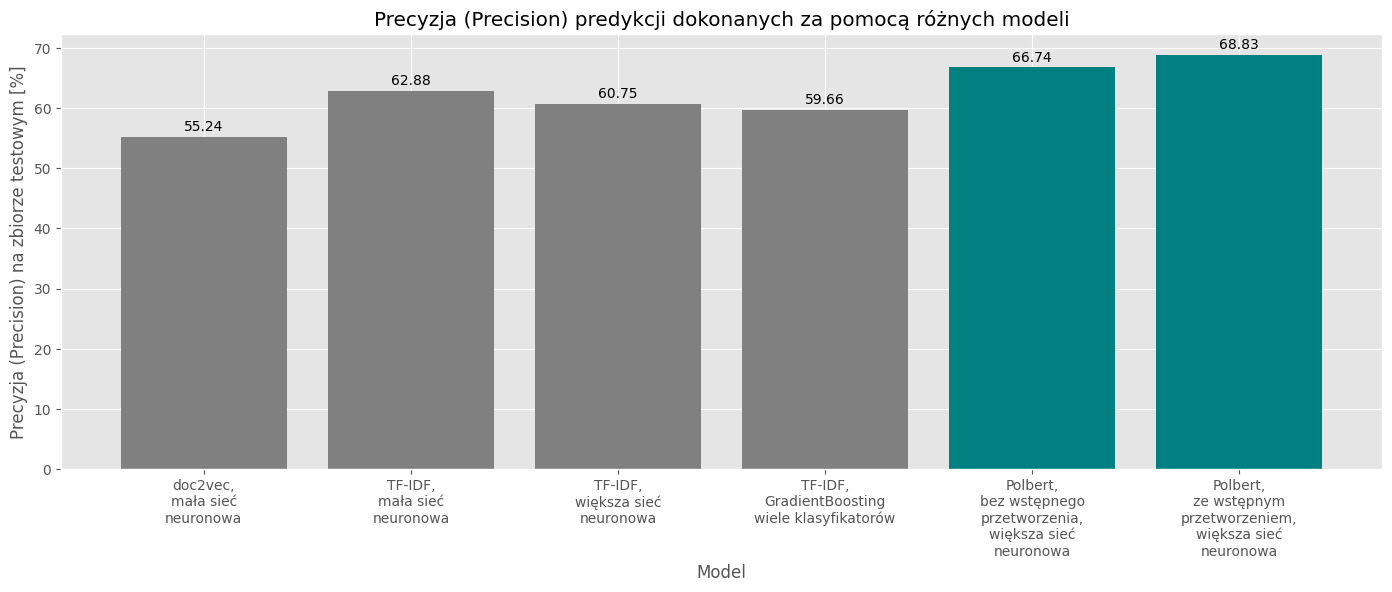

In [56]:
values = [val*100 for val in list(tested_options_prec.values())]


plt.figure(figsize=(14, 6))
bars = plt.bar(keys, values, color=['gray' for _ in range(4)]+['teal' for _ in range(2)])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('Precyzja (Precision) na zbiorze testowym [%]')
plt.title('Precyzja (Precision) predykcji dokonanych za pomocą różnych modeli')

plt.tight_layout(pad=1)
plt.savefig('ml_classifier_precision_polbert.png')
plt.show()